## Librerías :

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import cv2 as cv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tqdm import tqdm
%matplotlib inline

## Data Analysis:


In [3]:
classes={0:'Safe Driving'
         ,1:'texting - right'
         ,2:'talking on the phone - right'
         ,3:'texting - left'
         ,4:'talking on the phone - left'
         ,5:'operating the radio'
         ,6:'drinking'
         ,7:'reaching behind'
         ,8:'hair and makeup'
         ,9:'talking to passenger'}

In [4]:
data1 = pd.read_csv('../files/driver_imgs_list.csv')

for j in np.unique(data1["classname"]):
    print "clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j])

clase : c0 Numero de ejemplares: 2489
clase : c1 Numero de ejemplares: 2267
clase : c2 Numero de ejemplares: 2317
clase : c3 Numero de ejemplares: 2346
clase : c4 Numero de ejemplares: 2326
clase : c5 Numero de ejemplares: 2312
clase : c6 Numero de ejemplares: 2325
clase : c7 Numero de ejemplares: 2002
clase : c8 Numero de ejemplares: 1911
clase : c9 Numero de ejemplares: 2129


In [5]:
path_test_images='../../datasets/driver-detections/test/'
path_images='../../datasets/driver-detections/train/'
test_images_names=os.listdir(path_test_images)
print("Numero Ejemplares Test:",len(test_images_names))

('Numero Ejemplares Test:', 79726)


In [6]:
data1.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [7]:
imagen=cv.imread(path_test_images+random.choice(test_images_names))
print "Las dimensiones de cada imagen son de:",imagen.shape

Las dimensiones de cada imagen son de: (480, 640, 3)


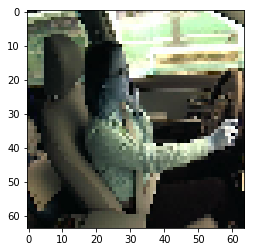

In [8]:
imagen2=cv.resize(imagen,(64,64),interpolation = cv.INTER_CUBIC)
plt.imshow(imagen2)

## Tiny Dataset Creation:

In [ ]:
size=1000 #<1911
X=[]
y=[]
for i in tqdm(np.unique(data1["classname"])):
    for j in np.random.choice(data1["img"][data1.classname==i],size):
    #for j in data1["img"][data1.classname==i]:
        temp_image=cv.cvtColor(cv.imread(path_images+i+"/"+j), cv.COLOR_BGR2RGB)
        X.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
        y.append(int(i[-1]))
        
c = list(zip(X, y))

random.shuffle(c)

X,y = zip(*c)   

X=np.array(X)
y=np.array(y)

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,shuffle=1)



X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255


print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

 30%|███       | 3/10 [02:33<05:57, 51.04s/it]

In [ ]:

plt.figure(figsize=(10,10))
for i,j in enumerate(np.random.randint(0,500,9)):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j],cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[j]]+"="+str(y_train[j]))

## DNN model definition:

### <span style="color:orange"> Model 1</span>:

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 6,425,866
Trainable params: 6,425,866
Non-trainable params: 0
_________________________________________________________________


$Fitting:$

In [21]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Epoch 1/15
500/500 [==============================] - 3s - loss: 9.9444 - acc: 0.1100     
Epoch 2/15
500/500 [==============================] - 2s - loss: 10.6244 - acc: 0.1500     
Epoch 3/15
500/500 [==============================] - 2s - loss: 10.1040 - acc: 0.2460     
Epoch 4/15
500/500 [==============================] - 2s - loss: 6.9674 - acc: 0.1880     
Epoch 5/15
500/500 [==============================] - 2s - loss: 2.1441 - acc: 0.2380     
Epoch 6/15
500/500 [==============================] - 2s - loss: 1.8034 - acc: 0.3780     
Epoch 7/15
500/500 [==============================] - 2s - loss: 1.6077 - acc: 0.4620     
Epoch 8/15
500/500 [==============================] - 2s - loss: 1.3148 - acc: 0.5220     
Epoch 9/15
500/500 [==============================] - 2s - loss: 1.1266 - acc: 0.6020     
Epoch 10/15
500/500 [==============================] - 3s - loss: 0.9260 - acc: 0.6760     
Epoch 11/15
500/500 [==============================] - 2s - loss: 0.7481 - acc: 0.7200 

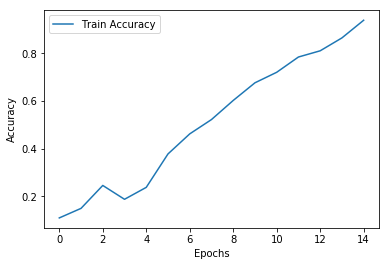

In [23]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## DNN changing parameters and layers, playing around with models

In [33]:
model2 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [34]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               6291968   
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 6,822,410
Trainable params: 6,822,410
Non-trainable params: 0
_________________________________________________________________


In [35]:
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model2.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Epoch 1/15
500/500 [==============================] - 3s - loss: 3.7135 - acc: 0.1120     
Epoch 2/15
500/500 [==============================] - 2s - loss: 2.2864 - acc: 0.1600     
Epoch 3/15
500/500 [==============================] - 2s - loss: 2.1832 - acc: 0.2300     
Epoch 4/15
500/500 [==============================] - 2s - loss: 1.8805 - acc: 0.3060     
Epoch 5/15
500/500 [==============================] - 2s - loss: 1.6209 - acc: 0.4120     
Epoch 6/15
500/500 [==============================] - 2s - loss: 1.3854 - acc: 0.4620     
Epoch 7/15
500/500 [==============================] - 2s - loss: 1.3337 - acc: 0.5120     
Epoch 8/15
500/500 [==============================] - 2s - loss: 1.2528 - acc: 0.5480     
Epoch 9/15
500/500 [==============================] - 2s - loss: 1.1150 - acc: 0.6160     
Epoch 10/15
500/500 [==============================] - 2s - loss: 0.8452 - acc: 0.6880     
Epoch 11/15
500/500 [==============================] - 2s - loss: 0.7969 - acc: 0.7360   

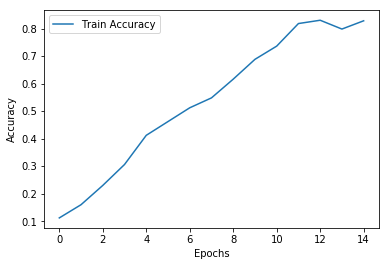

In [37]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model 3

In [47]:
model3 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.softmax)
])

In [48]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               1572992   
_________________________________________________________________
dense_29 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_30 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              525312    
Total params: 2,262,912
Trainable params: 2,262,912
Non-trainable params: 0
_________________________________________________________________


In [49]:
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history = model3.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Epoch 1/15
500/500 [==============================] - 1s - loss: 3.0128 - acc: 0.0940     
Epoch 2/15
500/500 [==============================] - 1s - loss: 2.2601 - acc: 0.1880     
Epoch 3/15
500/500 [==============================] - 1s - loss: 2.0028 - acc: 0.2960     
Epoch 4/15
500/500 [==============================] - 1s - loss: 1.6568 - acc: 0.4080     
Epoch 5/15
500/500 [==============================] - 1s - loss: 1.4259 - acc: 0.4700     
Epoch 6/15
500/500 [==============================] - 1s - loss: 1.2573 - acc: 0.5320     
Epoch 7/15
500/500 [==============================] - 1s - loss: 1.1378 - acc: 0.5940     
Epoch 8/15
500/500 [==============================] - 1s - loss: 1.0223 - acc: 0.6400     
Epoch 9/15
500/500 [==============================] - 1s - loss: 0.8620 - acc: 0.7000     
Epoch 10/15
500/500 [==============================] - 1s - loss: 0.7563 - acc: 0.7160     
Epoch 11/15
500/500 [==============================] - 1s - loss: 0.6315 - acc: 0.7840   

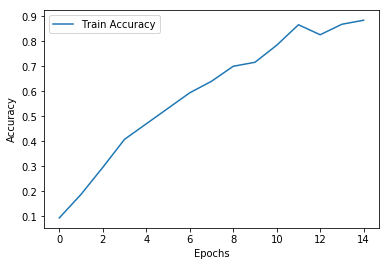

In [51]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model 5

In [32]:
model5 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [33]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                122890    
Total params: 122,890
Trainable params: 122,890
Non-trainable params: 0
_________________________________________________________________


In [34]:
model5.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model5.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2,validation_data=(X_test, y_test))

Epoch 1/15
500/500 [==============================] - 0s - loss: 3.1216 - acc: 0.1560      
Epoch 2/15
500/500 [==============================] - 0s - loss: 1.7024 - acc: 0.4440     
Epoch 3/15
500/500 [==============================] - 0s - loss: 1.2522 - acc: 0.6020     
Epoch 4/15
500/500 [==============================] - 0s - loss: 1.1011 - acc: 0.6540     
Epoch 5/15
500/500 [==============================] - 0s - loss: 0.9426 - acc: 0.7020     
Epoch 6/15
500/500 [==============================] - 0s - loss: 0.7041 - acc: 0.7820     
Epoch 7/15
500/500 [==============================] - 0s - loss: 0.5119 - acc: 0.8720     
Epoch 8/15
500/500 [==============================] - 0s - loss: 0.4004 - acc: 0.9040     
Epoch 9/15
500/500 [==============================] - 0s - loss: 0.3270 - acc: 0.9260     
Epoch 10/15
500/500 [==============================] - 0s - loss: 0.2911 - acc: 0.9400     
Epoch 11/15
500/500 [==============================] - 0s - loss: 0.2173 - acc: 0.9760  

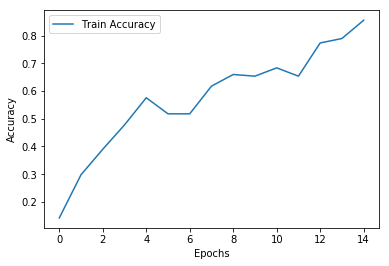

In [21]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model 4

In [36]:
model4 = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[64, 64, 3]),
    keras.layers.Dense(400, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [37]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               4915600   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                4010      
Total params: 4,919,610
Trainable params: 4,919,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
model4.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
history = model4.fit(X_train, y_train, batch_size=12, epochs=15, verbose=1)

Epoch 1/15
500/500 [==============================] - 2s - loss: 9.2278 - acc: 0.1420     
Epoch 2/15
500/500 [==============================] - 1s - loss: 7.0188 - acc: 0.2380     
Epoch 3/15
500/500 [==============================] - 1s - loss: 5.9099 - acc: 0.3740     
Epoch 4/15
500/500 [==============================] - 1s - loss: 5.5479 - acc: 0.4980     
Epoch 5/15
500/500 [==============================] - 1s - loss: 5.6997 - acc: 0.4780     
Epoch 6/15
500/500 [==============================] - 2s - loss: 5.5285 - acc: 0.4920     
Epoch 7/15
500/500 [==============================] - 2s - loss: 5.1611 - acc: 0.5860     
Epoch 8/15
500/500 [==============================] - 2s - loss: 5.0666 - acc: 0.6440     
Epoch 9/15
500/500 [==============================] - 1s - loss: 4.9948 - acc: 0.6380     
Epoch 10/15
500/500 [==============================] - 1s - loss: 4.9715 - acc: 0.6560     
Epoch 11/15
500/500 [==============================] - 2s - loss: 4.9189 - acc: 0.6800   

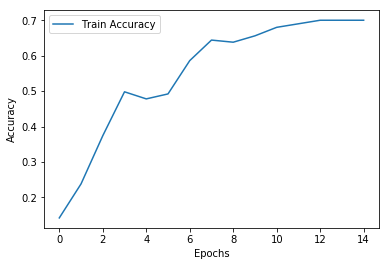

In [40]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()